# Compare Methods
This is a helper script to compare the output embedding distributions of multiple nonlinear dimensionality reduction techniques like Isomap, t-SNE, UMAP, VAEs

In [ ]:
##### Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

base = '/Users/fraserking/Development/pca/data/nonlinear/base.csv'
vae = '/Users/fraserking/Development/pca/data/nonlinear/vae.csv'
pip = '/Users/fraserking/Development/pca/data/nonlinear/pip_subset.csv'
palette = ['black', 'red', 'orange', 'blue', 'green']
features = ['n0_log', 'lambda_log', 'Fs', 'Rho_log', 'Sr_log', 'Nt_log']

In [2]:
##### Load precomputed outputs
pip_df = pd.read_csv(pip)
base_df = pd.read_csv(base)
vae_df = pd.read_csv(vae)
concat_df = pd.concat([pip_df, base_df, vae_df], axis=1)
df = concat_df.loc[:, ~concat_df.columns.str.contains('^Unnamed')]
df['umap1'] = -(df['umap1'] - np.nanmean(df['umap1']))
df['umap2'] = -(df['umap2'] - np.nanmean(df['umap2']))
df['umap3'] = (df['umap3'] - np.nanmean(df['umap3']))
print(df.columns)


Index(['site', 'time', 'n0', 'Nt', 'Fs', 'Sr', 'Ed', 'Rho', 'lambda', 'n0_log',
       'lambda_log', 'Nt_log', 'Rho_log', 'Sr_log', 'Dm', 'Dm_log', 'pca1',
       'pca2', 'pca3', 'iso1', 'iso2', 'iso3', 'tsne1', 'tsne2', 'tsne3',
       'umap1', 'umap2', 'umap3', 'vae1', 'vae2', 'vae3'],
      dtype='object')


/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/2051849511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umap1'] = -(df['umap1'] - np.nanmean(df['umap1']))
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/2051849511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umap2'] = -(df['umap2'] - np.nanmean(df['umap2']))
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/2051849511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

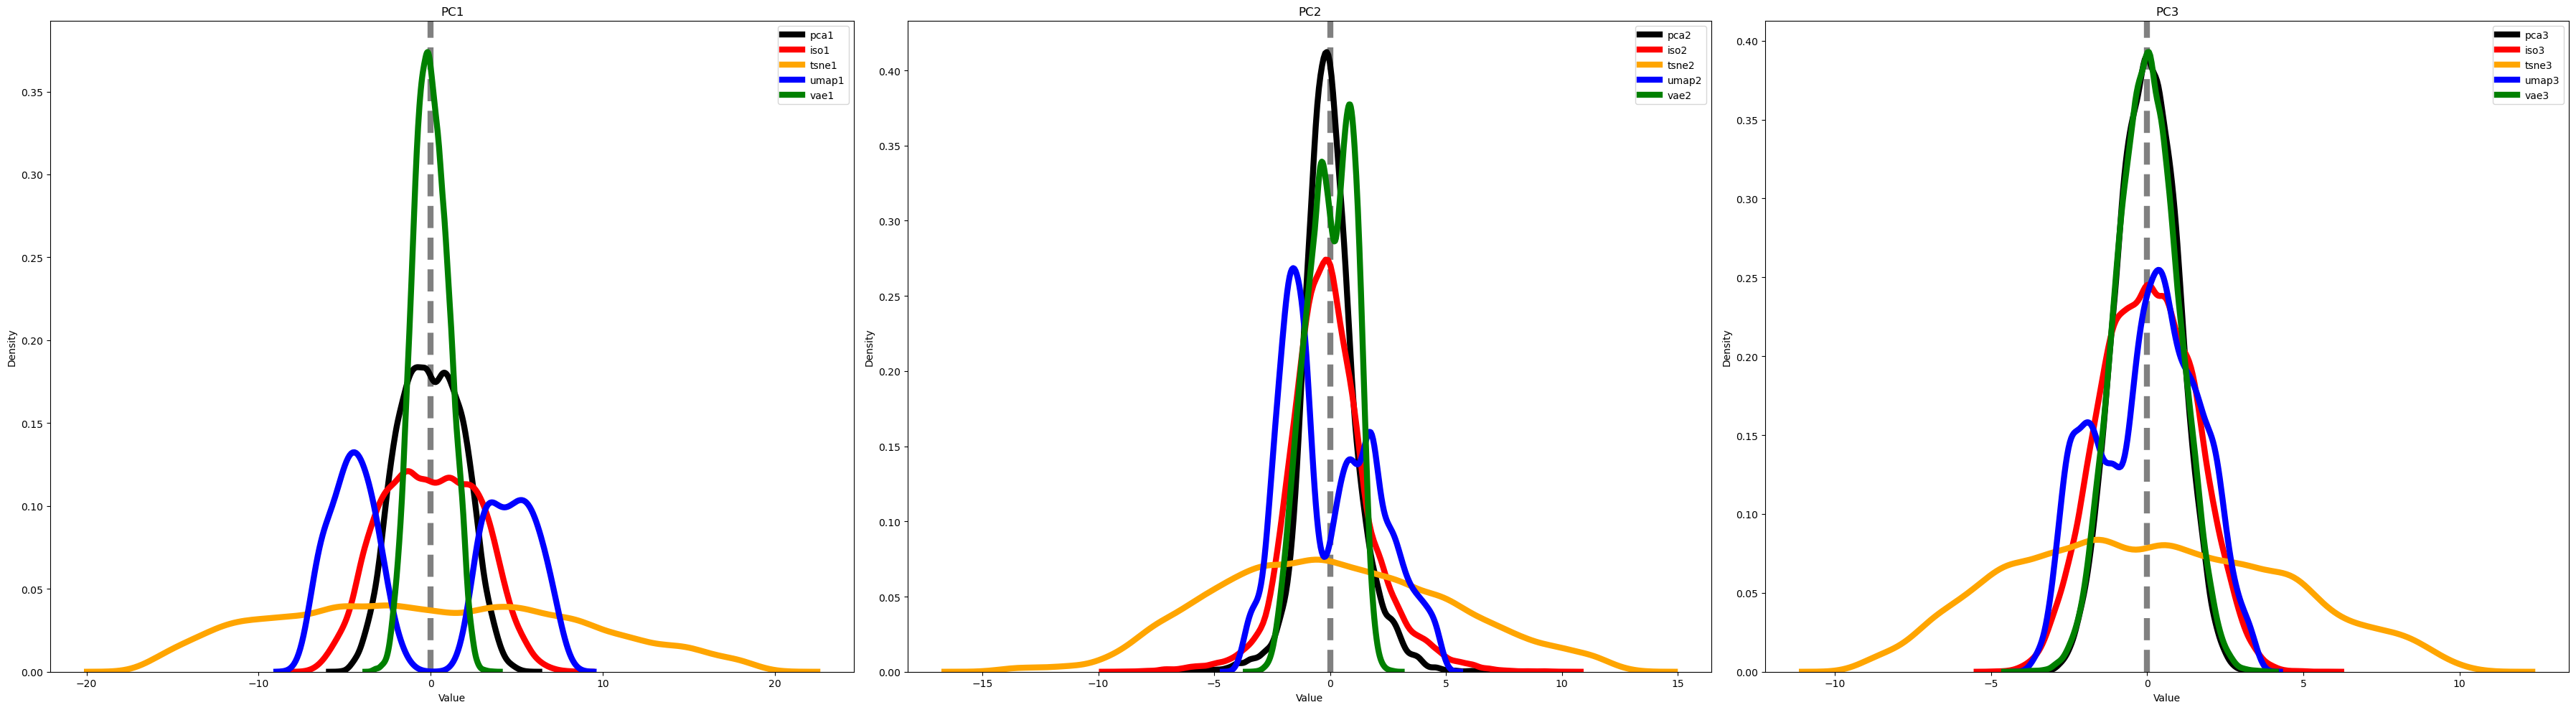

In [3]:
def plot_eof(data, subplot_index, palette, title):
    plt.subplot(1, 3, subplot_index) 
    plt.axvline(0, linestyle='--', color='gray', linewidth=6)
    for i, column in enumerate(data.columns):
        sns.kdeplot(data[column], label=column, color=palette[i], linewidth=6)

    plt.legend()
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')


plt.figure(figsize=(36, 10)) 
plot_eof(df[['pca1', 'iso1', 'tsne1', 'umap1', 'vae1']], 1, palette, 'PC1')
plot_eof(df[['pca2', 'iso2', 'tsne2', 'umap2', 'vae2']], 2, palette, 'PC2')
plot_eof(df[['pca3', 'iso3', 'tsne3', 'umap3', 'vae3']], 3, palette, 'PC3')
plt.tight_layout()
plt.show()

In [4]:
def plot_n0_lambda(data, vars):
    fig, ax = plt.subplots(figsize=(12,12))
    for i,var in enumerate(vars):
        sub_df = data[data[var] > 0]
        sns.kdeplot(sub_df, x="lambda_log", y="n0_log", levels=2, label=var, color=palette[i])
        sub_df = data[data[var] < 0]
        sns.kdeplot(sub_df, x="lambda_log", y="n0_log", levels=2, label=var, linestyles="--", color=palette[i])

    plt.xlabel("Log$_{10}$($\lambda$) (mm$^{-1)}$)")
    plt.ylabel("Log$_{10}$(N$_{0}$) (mm$^{-3}$ mm$^{-1}$)")
    plt.legend()
    plt.show()
        
# plot_n0_lambda(df, ['pca1', 'iso1', 'tsne1', 'umap1', 'vae1'])
# plot_n0_lambda(df, ['pca2', 'iso2', 'tsne2', 'umap2', 'vae2'])
# plot_n0_lambda(df, ['pca3', 'iso3', 'tsne3', 'umap3', 'vae3'])

In [5]:
def plot_rho_fs(data, vars):
    fig, ax = plt.subplots(figsize=(12,12))
    for i,var in enumerate(vars):
        sub_df = data[data[var] > 0]
        sns.kdeplot(sub_df, x="Rho_log", y="Fs", levels=2, label=var, color=palette[i])
        sub_df = data[data[var] < 0]
        sns.kdeplot(sub_df, x="Rho_log", y="Fs", levels=2, label=var, linestyles="--", color=palette[i])

    plt.xlabel("Log$_{10}$($\lambda$) (mm$^{-1)}$)")
    plt.ylabel("Log$_{10}$(N$_{0}$) (mm$^{-3}$ mm$^{-1}$)")
    plt.legend()
    plt.show()
        
# plot_rho_fs(df, ['pca1', 'iso1', 'tsne1', 'umap1', 'vae1'])
# plot_rho_fs(df, ['pca2', 'iso2', 'tsne2', 'umap2', 'vae2'])
# plot_rho_fs(df, ['pca3', 'iso3', 'tsne3', 'umap3', 'vae3'])

/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

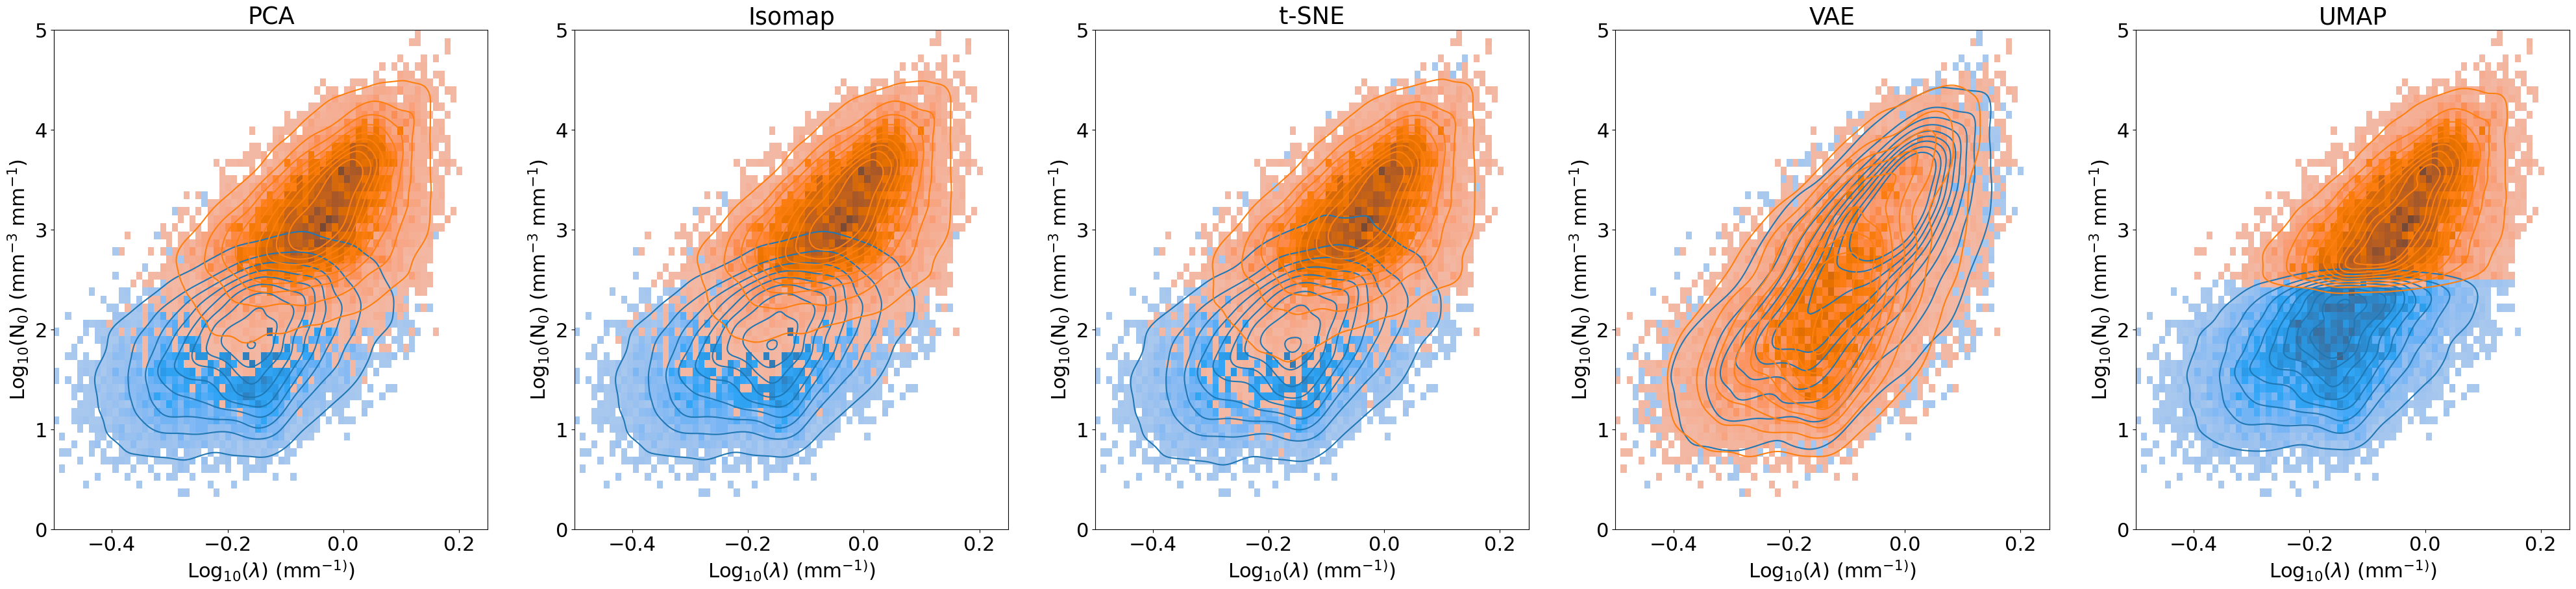

/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:26: SettingWithCopyWarning: 
A value is trying to be set on a 

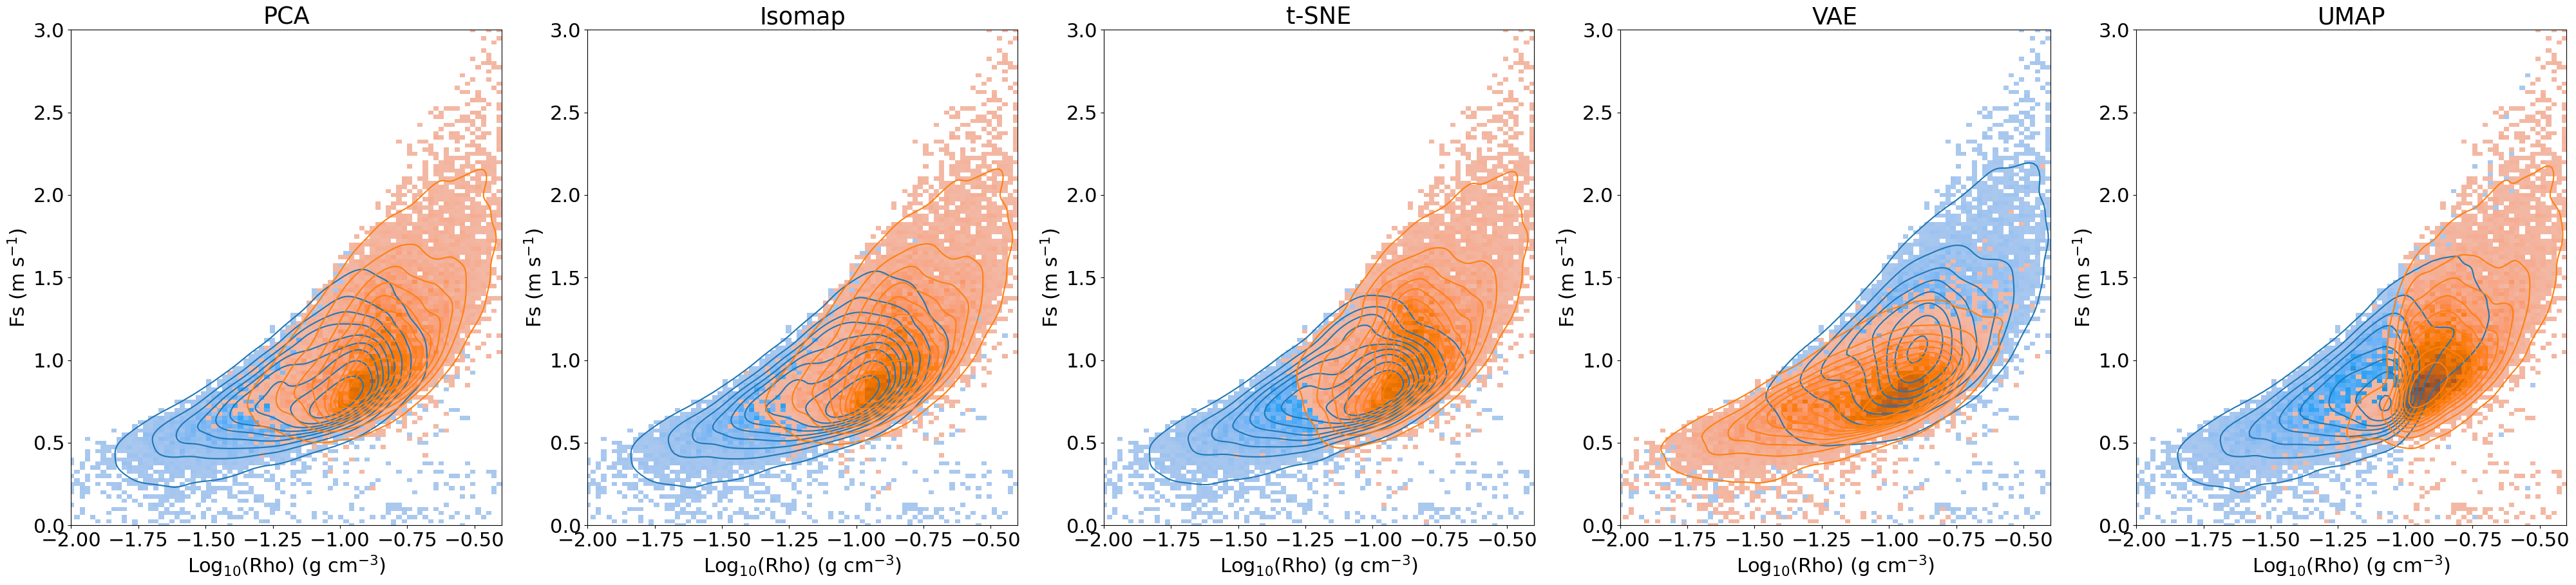

/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_8333/3641687020.py:44: SettingWithCopyWarning: 
A value is trying to be set on a 

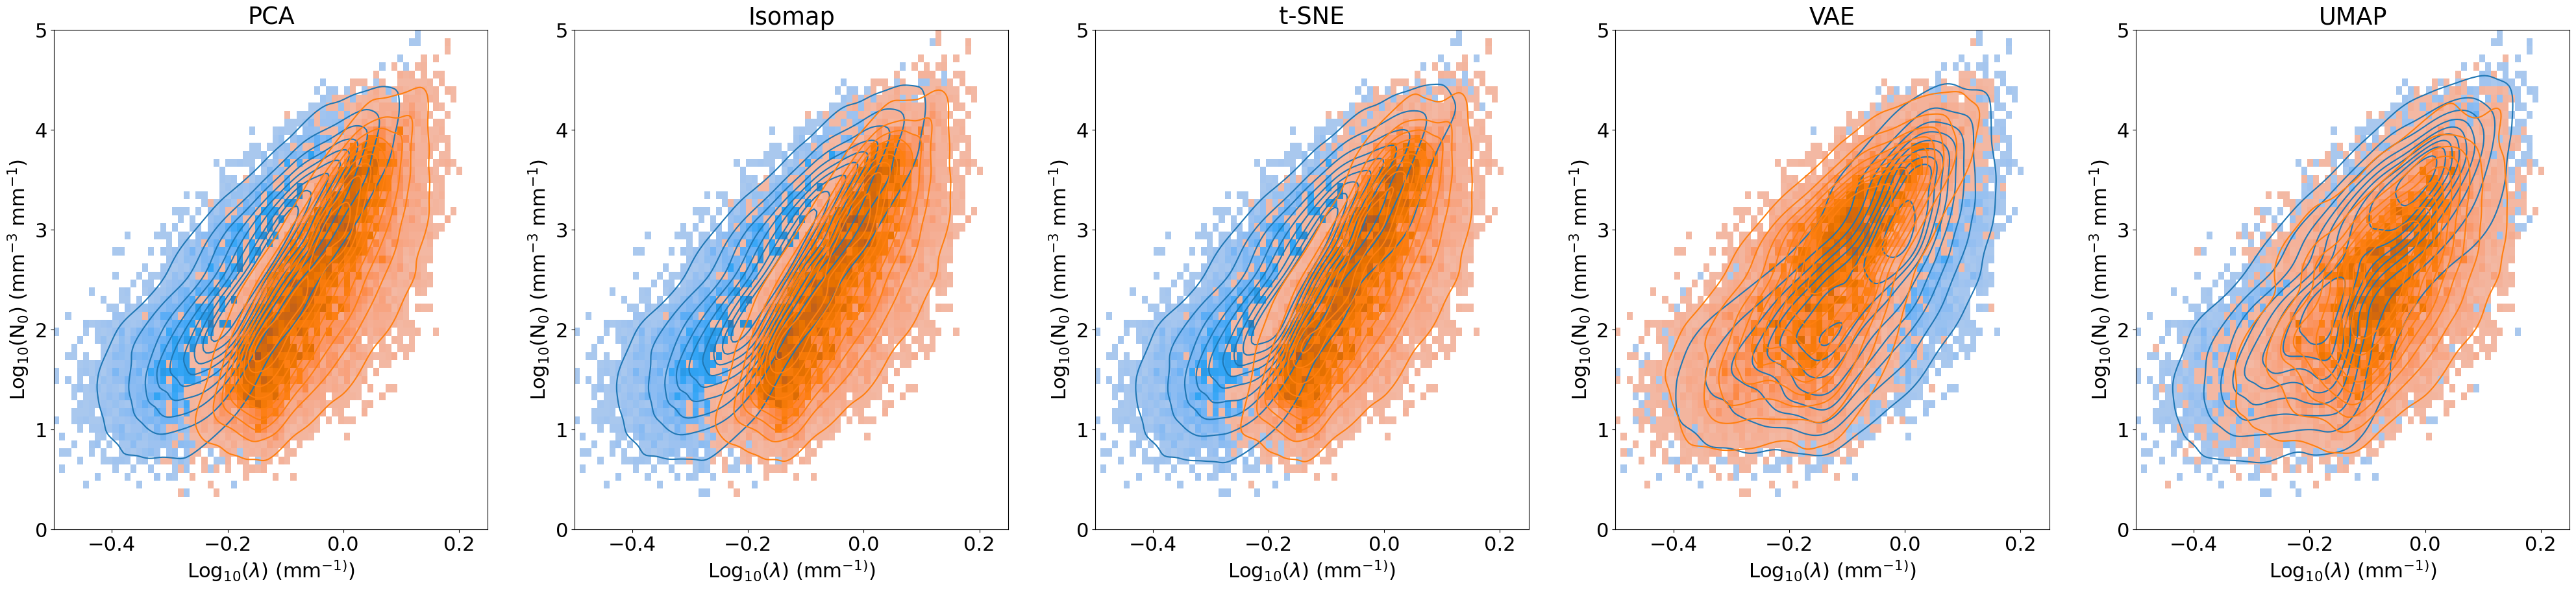

In [6]:
def plot_multi_comparisons(data_df, vars, vars2, vars3):
    titles = ['PCA', 'Isomap', 't-SNE', 'VAE', 'UMAP']
    plt.rcParams.update({'font.size': 22})
    fig, axes = plt.subplots(1, 5, figsize=(50,10))
    for i,var in enumerate(vars):
        data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
        sns.histplot(data_df, x="lambda_log", y="n0_log", hue="new_cluster", ax=axes[i])
        sns.kdeplot(data_df, x="lambda_log", y="n0_log", hue="new_cluster", ax=axes[i])
        axes[i].set_xlim((-0.5, 0.25))
        axes[i].set_ylim((0, 5))
        axes[i].set_title(titles[i])
        axes[i].legend([],[], frameon=False)
        axes[i].set_xlabel("Log$_{10}$($\lambda$) (mm$^{-1)}$)")
        axes[i].set_ylabel("Log$_{10}$(N$_{0}$) (mm$^{-3}$ mm$^{-1}$)")
    plt.show()

    fig, axes = plt.subplots(1, 5, figsize=(50,10))
    for i,var in enumerate(vars2):
        if 'umap' in var:
            data_df['new_cluster'] = np.where(data_df[var] > 0, 0, 1)
        else:
            data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
        sns.histplot(data_df, x="Rho_log", y="Fs", hue="new_cluster", ax=axes[i])
        sns.kdeplot(data_df, x="Rho_log", y="Fs", hue="new_cluster", ax=axes[i])
        axes[i].set_xlim((-2, -0.4))
        axes[i].set_ylim((0, 3))
        axes[i].set_title(titles[i])
        axes[i].legend([],[], frameon=False)
        axes[i].set_xlabel("Log$_{10}$(Rho) (g cm$^{-3}$)")
        axes[i].set_ylabel("Fs (m s$^{-1}$)")
    plt.show()

    fig, axes = plt.subplots(1, 5, figsize=(50,10))
    for i,var in enumerate(vars3):
        if 'umap' in var:
            data_df['new_cluster'] = np.where(data_df[var] > 0, 0, 1)
        else:
            data_df['new_cluster'] = np.where(data_df[var] > 0, 1, 0)
        sns.histplot(data_df, x="lambda_log", y="n0_log", hue="new_cluster", ax=axes[i])
        sns.kdeplot(data_df, x="lambda_log", y="n0_log", hue="new_cluster", ax=axes[i])
        axes[i].set_xlim((-0.5, 0.25))
        axes[i].set_ylim((0, 5))
        axes[i].set_title(titles[i])
        axes[i].legend([],[], frameon=False)
        axes[i].set_xlabel("Log$_{10}$($\lambda$) (mm$^{-1)}$)")
        axes[i].set_ylabel("Log$_{10}$(N$_{0}$) (mm$^{-3}$ mm$^{-1}$)")
    plt.show()

plot_multi_comparisons(df, ['pca1', 'iso1', 'tsne1', 'vae1', 'umap1'], ['pca2', 'iso2', 'tsne2', 'vae2', 'umap2'], ['pca3', 'iso3', 'tsne3', 'vae3', 'umap3'])


In [ ]:
print("All done!")